In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
file_path = r"C:\Users\ChanakyaY\Downloads\titanic_train.csv"
titanic_df = pd.read_csv(file_path)

In [167]:
titanic_df.shape

(891, 12)

In [168]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [171]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
# info about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EXPLORATORY DATA ANALYSIS 

In [174]:
titanic_df.describe() # gives all numeric featrures of data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [175]:
# 38 % people survived

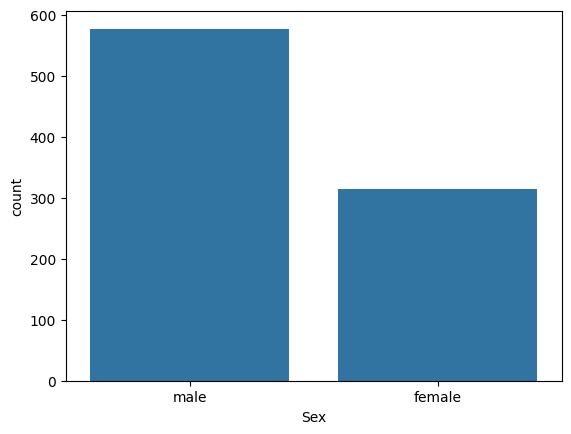

In [178]:
sns.countplot(x= 'Sex',data = titanic_df)
plt.show()

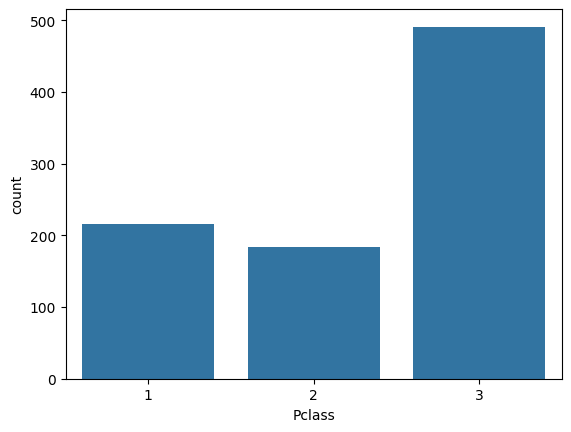

In [179]:
sns.countplot(x= 'Pclass',data = titanic_df)
plt.show()

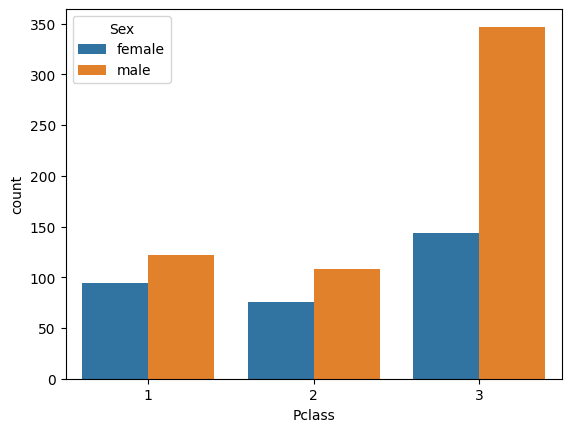

In [182]:
sns.countplot(x= 'Pclass',data = titanic_df,hue = 'Sex')
plt.show()

C:\Users\ChanakyaY\AppData\Local\Temp\ipykernel_39800\4024628053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_df['Age'],bins = 20) # distrubutive plot


<Axes: xlabel='Age', ylabel='Density'>

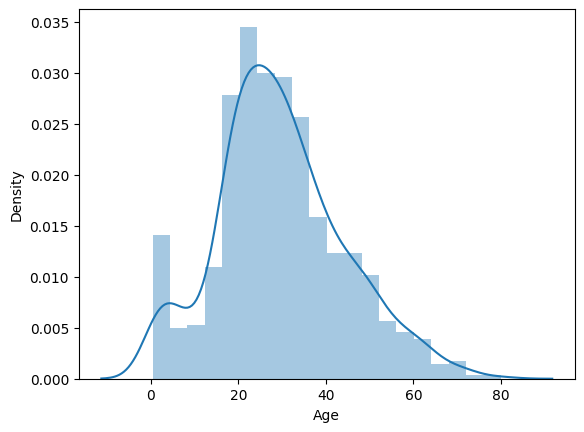

In [183]:
sns.distplot(titanic_df['Age'],bins = 20) # distrubutive plot

In [184]:
# if i have sibling ,spouse and paretn,children then i am not travelling alone
# create new column along if they are travelloing with atleast one peson

titanic_df['Along'] = titanic_df['SibSp'] + titanic_df['Parch']

In [185]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [186]:
titanic_df['Along'].loc[titanic_df['Along'] > 0] =1 # wherever in along column if a number >0 is present then we assign to a label 1

C:\Users\ChanakyaY\AppData\Local\Temp\ipykernel_39800\1401827881.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_df['Along'].loc[titanic_df['Along'] > 0] =1 # wherever in along column if a number >0 is present then we assign to a

In [187]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


## Factors to Survive

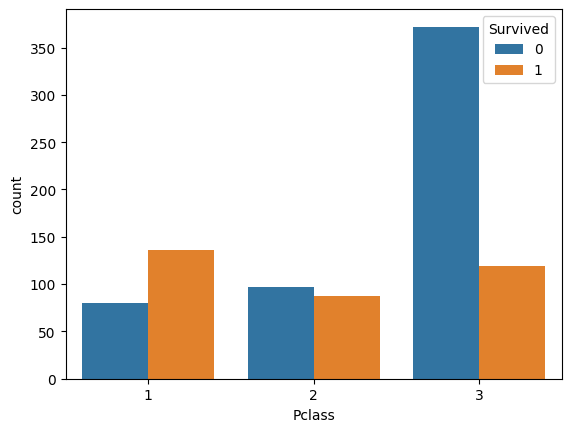

In [190]:
sns.countplot(x= 'Pclass',data = titanic_df,hue = 'Survived')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

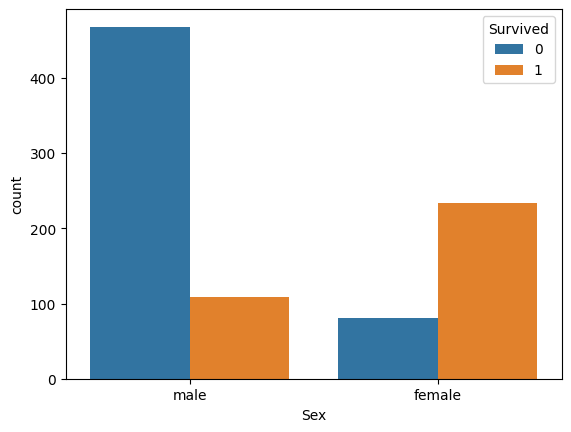

In [191]:
sns.countplot(x= 'Sex',data = titanic_df,hue = 'Survived')

## DATA PREPARATION

In [193]:
# REMOVE Irrevelant data and convert everything into numericals until it gets ready for model

In [194]:
titanic_df = titanic_df.drop(columns = ['PassengerId','Name','Ticket','Cabin','Embarked'])

In [196]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0
887,1,1,female,19.0,0,0,30.0000,0
888,0,3,female,NaN,1,2,23.4500,1
889,1,1,male,26.0,0,0,30.0000,0


In [197]:
# male - 1 and female -0
titanic_df.loc[:, 'Sex'] = np.where(titanic_df['Sex'] == 'male', 1, 0)

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


<Axes: >

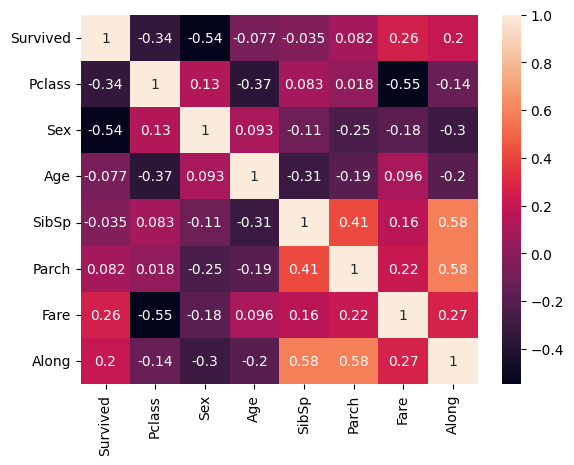

In [219]:
sns.heatmap(titanic_df.corr(),annot = True)

In [223]:
# here we take the absolute value of each feature, sex has highest 

## Handling Missing values

In [226]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Along         0
dtype: int64

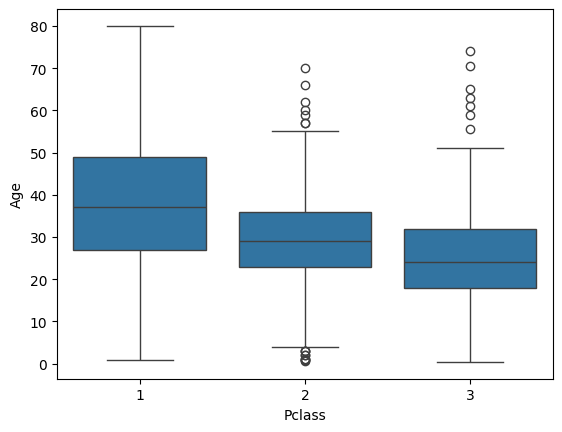

In [228]:
sns.boxplot(x= 'Pclass',y = 'Age',data = titanic_df)
plt.show()

In [233]:
titanic_df['Age'].mean()

29.69911764705882

In [261]:
print(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean())
print(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean())
print(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [281]:
# wherevere we have null ,fill that age based on class
def fill_age(row):
    age = row[0]
    pclass = row[1]

    if pd.isnull(age):
        if pclass == 1:
            return 38.23
        elif pclass == 2:
            return 29.87
        else:
            return 25.14
    else:
        return age
    print()

In [287]:
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(fill_age,axis = 1)

C:\Users\ChanakyaY\AppData\Local\Temp\ipykernel_39800\1795728050.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = row[0]
C:\Users\ChanakyaY\AppData\Local\Temp\ipykernel_39800\1795728050.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = row[1]


In [289]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Along       0
dtype: int64

In [291]:
# for decision trees , there is no need to do normalization , it is not distance based algortjim

## Model building

In [294]:
X = titanic_df.drop(columns = ['Survived'])
y = titanic_df['Survived']

In [300]:
from sklearn.model_selection import train_test_split

In [302]:
X_train , X_test , y_train , y_test = train_test_split(X.values,y.values,test_size = 0.2,random_state =0)

In [304]:
X_train.shape , X_test.shape

((712, 7), (179, 7))

In [306]:
from sklearn.tree import DecisionTreeClassifier

In [326]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)

In [328]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [330]:
y_pred = model.predict(X_test)

In [332]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [334]:
model.score(X_train,y_train) 

0.8342696629213483

In [336]:
model.score(X_test,y_test)

0.8212290502793296

In [338]:
from sklearn.metrics import classification_report ,f1_score

In [340]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [342]:
f1_score(y_test,y_pred)

0.7611940298507462

## Visualise the tree

In [345]:
from sklearn import tree

In [351]:
features = X.columns

In [353]:
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Along'], dtype='object')

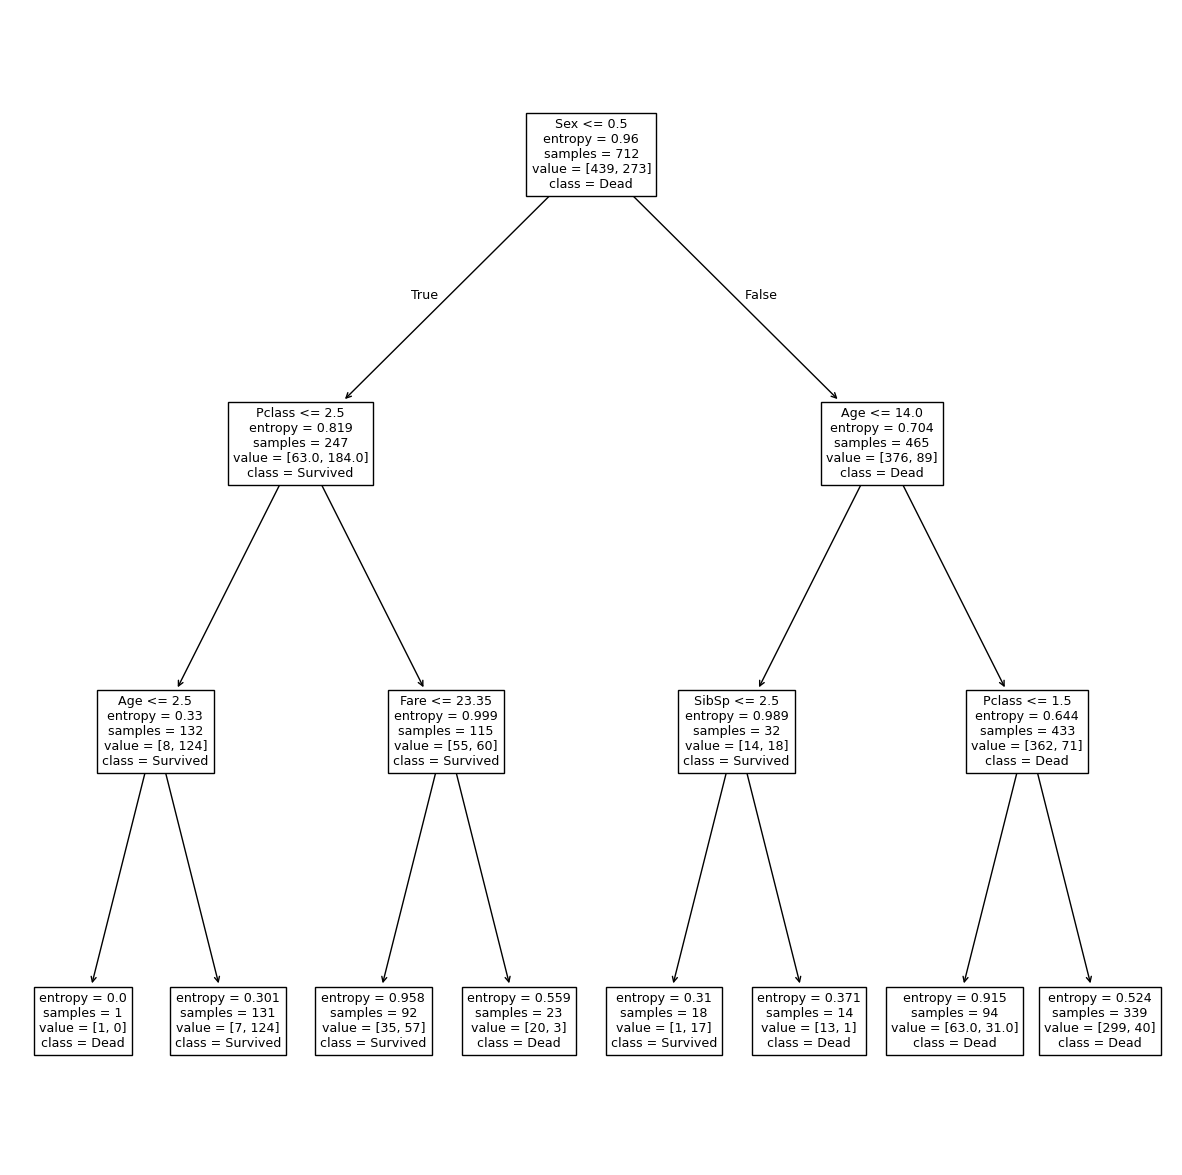

In [359]:
plt.figure(figsize = (15,15))
result = tree.plot_tree(model,feature_names = features,class_names = ['Dead','Survived'])